## Analise da serie temporal 01 - Cotacao do Dolar em relacao ao Real

In [1]:
import pandas as pd
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose

# imports de modulos que estao definidos dentro do projeto
import arima
import timeseries

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_original = pd.read_csv('../output/timeseries01.csv', header=0, names=['date', 'rate'])

arima.print_dataframe_info(df_original)

SHAPE: (6225, 2)

DTYPES: date    object
rate    object
dtype: object

##########################################################################################
HEAD 

         date    rate
0  1995-01-02  0.8440
1  1995-01-03  0.8450
2  1995-01-04  0.8450
3  1995-01-05  0.8430
4  1995-01-06  0.8400


##########################################################################################
TAIL 

            date    rate
6220  2018-10-30  3.6964
6221  2018-10-31  3.7219
6222  2018-11-01  3.6967
6223  2018-11-02  3.6952
6224  2018-11-03  3.6952


In [3]:
df_daily = df_original.copy()
df_daily['date'] = pd.to_datetime(df_daily['date'])
df_daily = df_daily.set_index('date')

arima.print_dataframe_info(df_daily)

SHAPE: (6225, 1)

DTYPES: rate    object
dtype: object

##########################################################################################
HEAD 

              rate
date              
1995-01-02  0.8440
1995-01-03  0.8450
1995-01-04  0.8450
1995-01-05  0.8430
1995-01-06  0.8400


##########################################################################################
TAIL 

              rate
date              
2018-10-30  3.6964
2018-10-31  3.7219
2018-11-01  3.6967
2018-11-02  3.6952
2018-11-03  3.6952


In [4]:
# esse comando preenche as datas que estao faltando
df_daily = df_daily.resample('D').ffill()

arima.print_dataframe_info(df_daily)

SHAPE: (8707, 1)

DTYPES: rate    object
dtype: object

##########################################################################################
HEAD 

              rate
date              
1995-01-02  0.8440
1995-01-03  0.8450
1995-01-04  0.8450
1995-01-05  0.8430
1995-01-06  0.8400


##########################################################################################
TAIL 

              rate
date              
2018-10-30  3.6964
2018-10-31  3.7219
2018-11-01  3.6967
2018-11-02  3.6952
2018-11-03  3.6952


In [5]:
df_daily = df_daily.replace(0, np.nan)
df_daily = df_daily.replace('.', np.nan)

print(df_daily.isnull().values.any())

True


In [6]:
df_daily = df_daily.fillna(method='ffill')

print(df_daily.isnull().values.any())

False


In [7]:
df_daily['rate'] = pd.to_numeric(df_daily['rate'])

arima.print_dataframe_info(df_daily)

SHAPE: (8707, 1)

DTYPES: rate    float64
dtype: object

##########################################################################################
HEAD 

             rate
date             
1995-01-02  0.844
1995-01-03  0.845
1995-01-04  0.845
1995-01-05  0.843
1995-01-06  0.840


##########################################################################################
TAIL 

              rate
date              
2018-10-30  3.6964
2018-10-31  3.7219
2018-11-01  3.6967
2018-11-02  3.6952
2018-11-03  3.6952


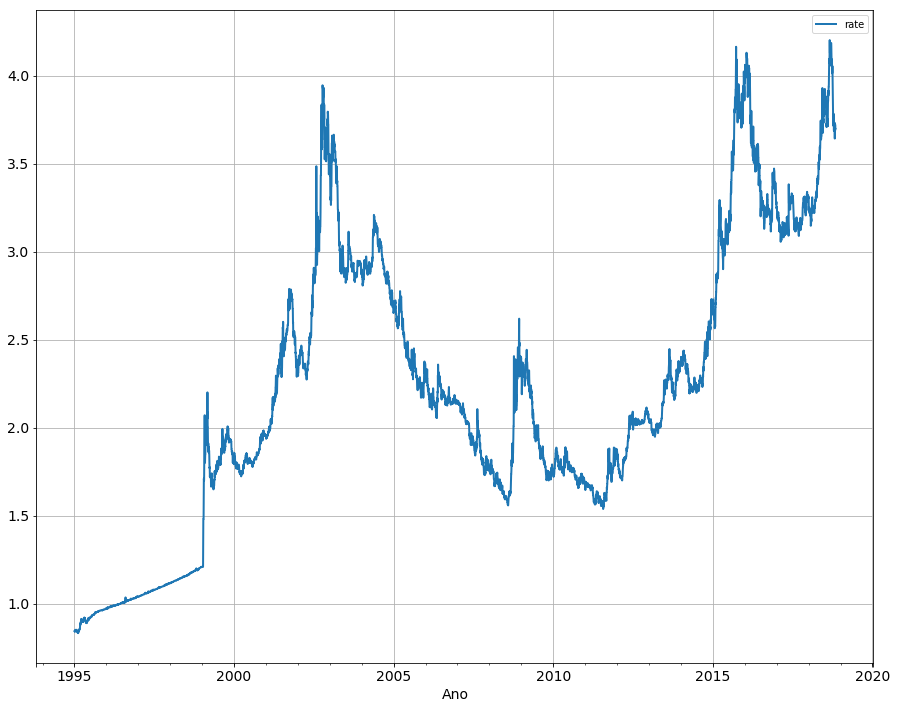

In [8]:
timeseries.plot_timeserie(df_daily)

In [9]:
# removo o periodo inicial da serie temporal
# tem um padrao que nao se repete
# estou trabalhando com dados de 18 anos
df_daily = df_daily['2000-11-03':]

arima.print_dataframe_info(df_daily)

SHAPE: (6575, 1)

DTYPES: rate    float64
dtype: object

##########################################################################################
HEAD 

              rate
date              
2000-11-03  1.9370
2000-11-04  1.9370
2000-11-05  1.9370
2000-11-06  1.9410
2000-11-07  1.9545


##########################################################################################
TAIL 

              rate
date              
2018-10-30  3.6964
2018-10-31  3.7219
2018-11-01  3.6967
2018-11-02  3.6952
2018-11-03  3.6952


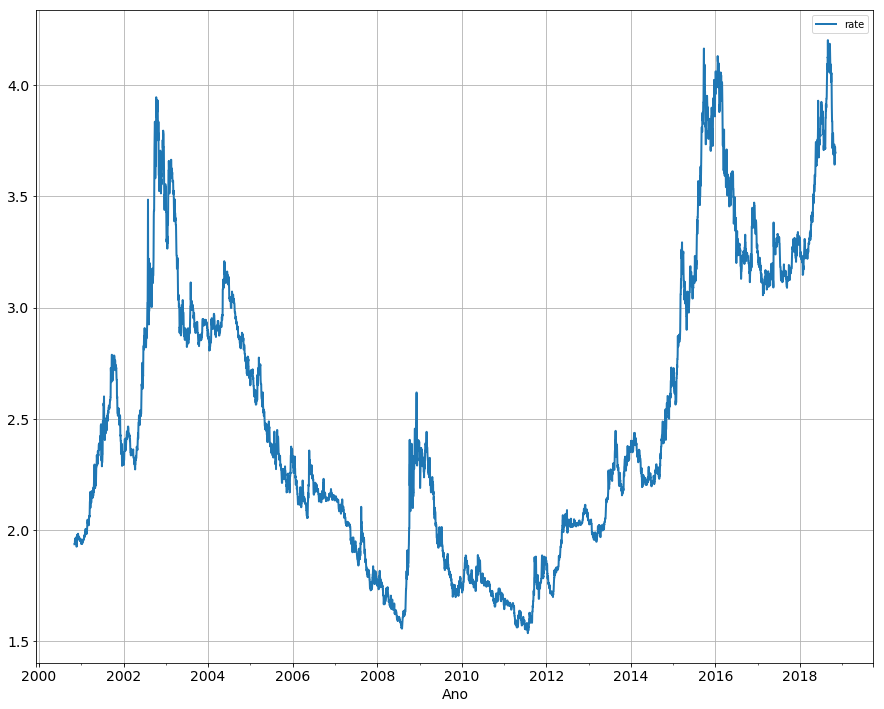

In [10]:
timeseries.plot_timeserie(df_daily)

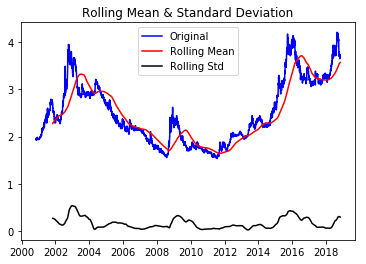

Results of Dickey-Fuller Test:
Test Statistic (-1.155210) > Critical Value 1 (-3.431350)
Test Statistic (-1.155210) > Critical Value 5 (-2.861982)
Test Statistic (-1.155210) > Critical Value 10 (-2.567005)
p-value (0.692560) > 0.05


In [11]:
timeseries.check_stationarity(df_daily, window=365)

In [12]:
df_monthly = df_daily.resample('M')
df_monthly = df_monthly.mean()

arima.print_dataframe_info(df_monthly)

SHAPE: (217, 1)

DTYPES: rate    float64
dtype: object

##########################################################################################
HEAD 

                rate
date                
2000-11-30  1.951596
2000-12-31  1.963548
2001-01-31  1.956661
2001-02-28  2.005250
2001-03-31  2.098597


##########################################################################################
TAIL 

                rate
date                
2018-07-31  3.823542
2018-08-31  3.924729
2018-09-30  4.105923
2018-10-31  3.758874
2018-11-30  3.695700


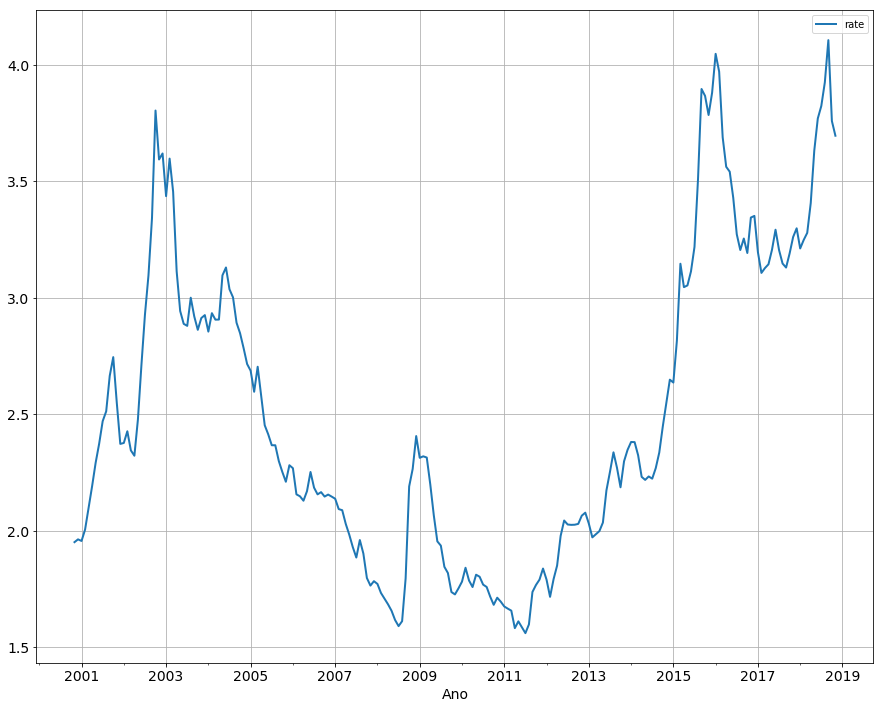

In [13]:
timeseries.plot_timeserie(df_monthly)

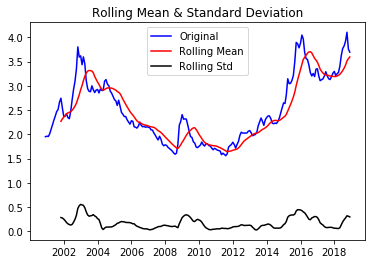

Results of Dickey-Fuller Test:
Test Statistic (-1.376881) > Critical Value 1 (-3.461136)
Test Statistic (-1.376881) > Critical Value 5 (-2.875079)
Test Statistic (-1.376881) > Critical Value 10 (-2.573986)
p-value (0.593308) > 0.05


In [14]:
timeseries.check_stationarity(df_monthly, window=12)

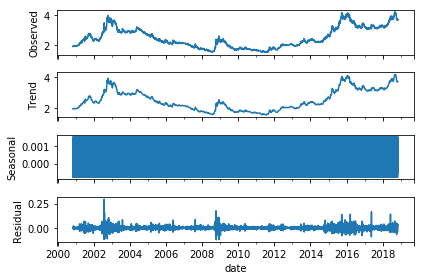

In [15]:
result = seasonal_decompose(df_daily, model='additive')
result.plot()
plt.show()

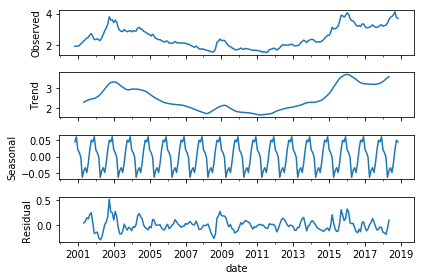

In [16]:
result = seasonal_decompose(df_monthly, model='additive')
result.plot()
plt.show()